In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px 
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('data/stud.csv')

In [6]:
df.head(10)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [7]:
df.shape

(1000, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [12]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [13]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [14]:
print("Categories in 'gender' varialble" ,df['gender'].unique())
print("Categories in 'race/ethnicity' varialble", df['race_ethnicity'].unique())
print("Categories in 'parental level of education' varialble", df['parental_level_of_education'].unique())
print("Categories in 'lunch' varialble", df['lunch'].unique())
print("Categories in 'test preparation course' varialble", df['test_preparation_course'].unique())
print("Categories in 'math score' varialble", df['math_score'].unique())
print("Categories in 'reading score' varialble", df['reading_score'].unique())
print("Categories in 'writing score' varialble", df['writing_score'].unique())


Categories in 'gender' varialble ['female' 'male']
Categories in 'race/ethnicity' varialble ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' varialble ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' varialble ['standard' 'free/reduced']
Categories in 'test preparation course' varialble ['none' 'completed']
Categories in 'math score' varialble [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Categories in 'reading score' varialble [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63

In [15]:
#feature
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('There are {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nThere are {} categorical features : {}'.format(len(categorical_features), categorical_features))

There are 3 numerical features : ['math_score', 'reading_score', 'writing_score']

There are 5 categorical features : ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [16]:
df['total score']=df['math_score']+df['reading_score']+df['writing_score']
df['average']=df['total score']/3
df = df.round(2)
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


In [17]:
reading_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()

print(f"Number of students with full marks in Reading: {reading_full}")
print(f"Number of students with full marks in Writing: {writing_full}")
print(f"Number of students with full marks in Math: {math_full}")

Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14
Number of students with full marks in Math: 7


In [18]:
reading_less_20 = df[df['reading_score'] <= 20]['average'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average'].count()
math_less_20 = df[df['math_score'] <= 20]['average'].count()

print(f"Number of students with less than 20 marks in Reading: {reading_less_20}")
print(f"Number of students with less than 20 marks in Writing: {writing_less_20}")
print(f"Number of students with less than 20 marks in Math: {math_less_20}")

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Math: 4


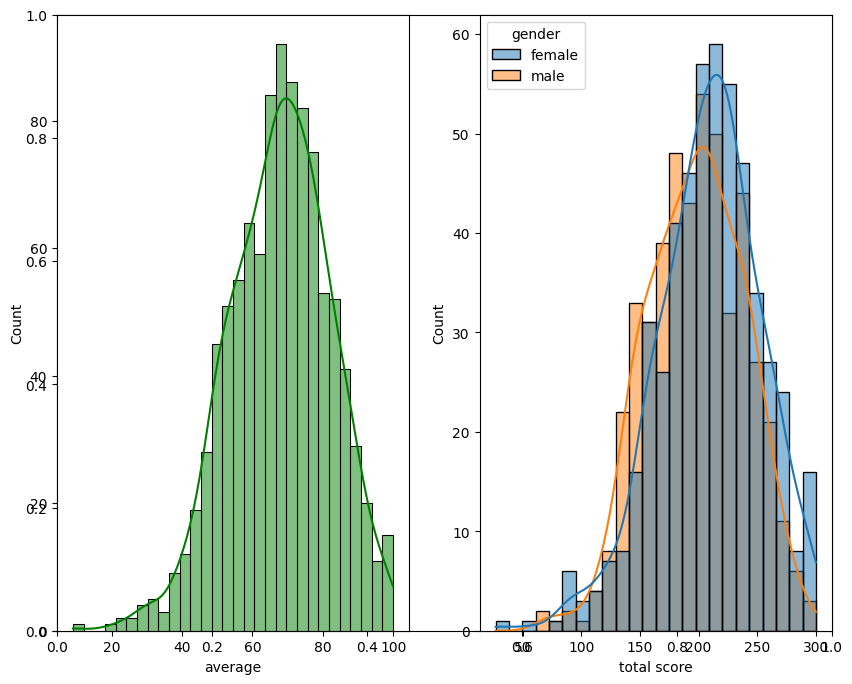

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total score', kde=True, hue='gender')
plt.show()

In [20]:
#3D Scatter Plot
fig = px.scatter_3d(df, x='math_score', y='reading_score', z='writing_score',
                   color='gender', symbol='test_preparation_course',
                   title='3D Score Distribution by Gender & Test Prep',
                   hover_data=['parental_level_of_education', 'lunch'])
fig.show()

In [21]:
#Sunburst Chart - Hierarchical Data
fig = px.sunburst(df, path=['race_ethnicity', 'parental_level_of_education', 'gender'],
                  values='math_score', title='Student Demographics Hierarchy')
fig.show()

In [22]:
#Parallel Coordinates Plot
fig = px.parallel_coordinates(df, color='math_score',
                            dimensions=['math_score', 'reading_score', 'writing_score'],
                            title='Score Patterns Across Subjects')
fig.show()

In [23]:
#Violin Plot with Box Plot
fig = go.Figure()
for subject in ['math_score', 'reading_score', 'writing_score']:
    fig.add_trace(go.Violin(y=df[subject], name=subject.replace('_', ' ').title(),
                           box_visible=True, meanline_visible=True))
fig.update_layout(title='Score Distribution by Subject', yaxis_title='Score')
fig.show()

In [24]:
#Radar Chart - Average Scores by Group
avg_scores = df.groupby('race_ethnicity')[['math_score', 'reading_score', 'writing_score']].mean()

fig = go.Figure()
for group in avg_scores.index:
    fig.add_trace(go.Scatterpolar(
        r=avg_scores.loc[group].values,
        theta=['Math', 'Reading', 'Writing'],
        fill='toself',
        name=group
    ))
fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[0, 100])),
                  title='Average Scores by Race/Ethnicity')
fig.show()

In [26]:
#Animated Bubble Chart - Score evolution by parent education
df['total_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
bubble_data = df.groupby(['parental_level_of_education', 'gender']).agg({
    'total_score': 'mean',
    'math_score': 'mean',
    'reading_score': 'mean'
}).reset_index()

fig = px.scatter(bubble_data, x='math_score', y='reading_score', 
                size='total_score', color='parental_level_of_education',
                hover_name='gender', animation_frame='parental_level_of_education',
                title=' Animated Bubble Chart - Score Evolution by Education Level')
fig.show()

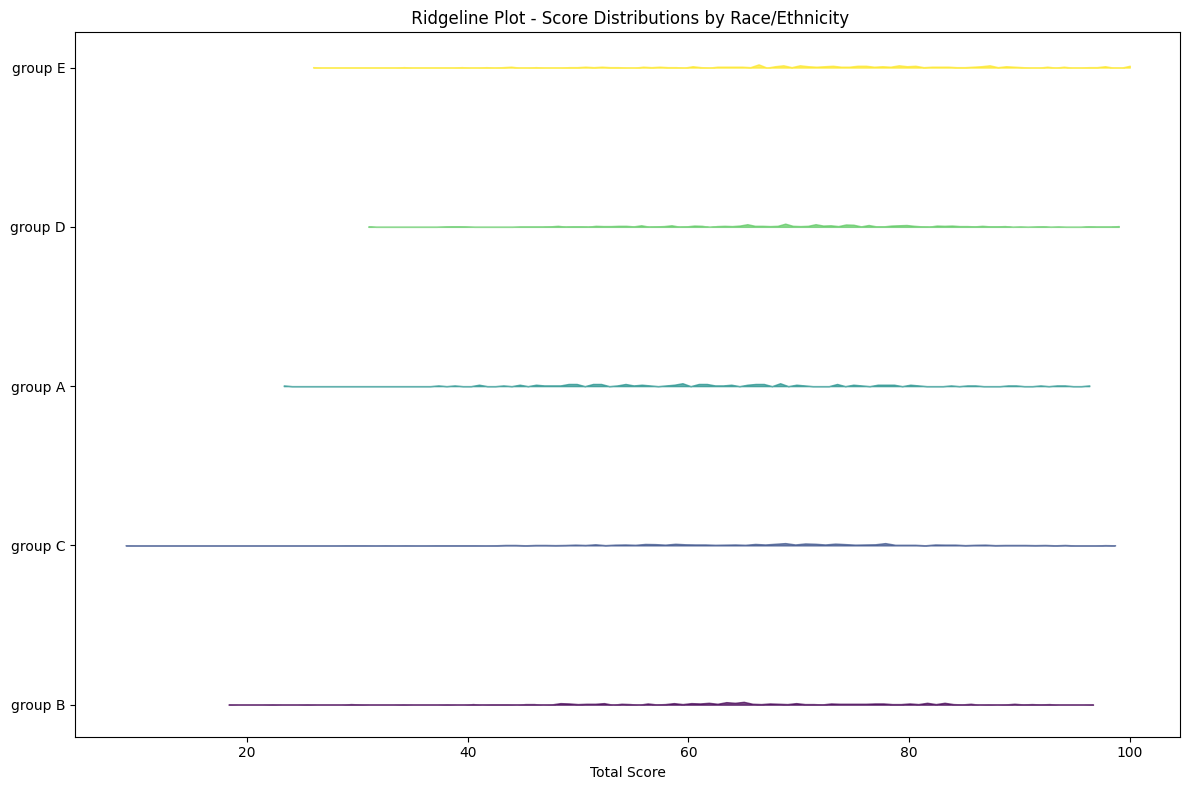

In [27]:
# Ridgeline Plot - Score distributions by race/ethnicity
fig, ax = plt.subplots(figsize=(12, 8))
groups = df['race_ethnicity'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(groups)))

for i, group in enumerate(groups):
    data = df[df['race_ethnicity'] == group]['total_score']
    ax.fill_between(np.linspace(data.min(), data.max(), 100), 
                   i + np.histogram(data, bins=100, density=True)[0] * 0.3,
                   i, alpha=0.7, color=colors[i], label=group)
    
ax.set_yticks(range(len(groups)))
ax.set_yticklabels(groups)
ax.set_xlabel('Total Score')
ax.set_title(' Ridgeline Plot - Score Distributions by Race/Ethnicity')
plt.tight_layout()
plt.show()

In [28]:
#  Interactive Treemap - Hierarchical performance visualization
treemap_data = df.groupby(['race_ethnicity', 'parental_level_of_education']).agg({
    'total_score': 'mean',
    'gender': 'count'
}).reset_index()
treemap_data.rename(columns={'gender': 'count'}, inplace=True)

fig = px.treemap(treemap_data, path=['race_ethnicity', 'parental_level_of_education'],
                values='count', color='total_score', color_continuous_scale='RdYlBu',
                title='Interactive Treemap - Performance by Demographics')
fig.show()

In [30]:
#  Circular Bar Plot - Polar coordinate performance
circular_data = df.groupby('parental_level_of_education')['total_score'].mean().reset_index()

fig = px.bar_polar(circular_data, r='total_score', theta='parental_level_of_education',
                  color='total_score', color_continuous_scale='plasma',
                  title=' Circular Bar Plot - Performance in Polar Coordinates')
fig.show()


In [32]:
# 3D Rainbow Score Galaxy
fig = px.scatter_3d(df, x='math_score', y='reading_score', z='writing_score',
                   color='total_score', size='total_score',
                   color_continuous_scale='rainbow',
                   hover_data=['gender', 'race_ethnicity'],
                   title=' 3D Rainbow Score Galaxy')
fig.show()

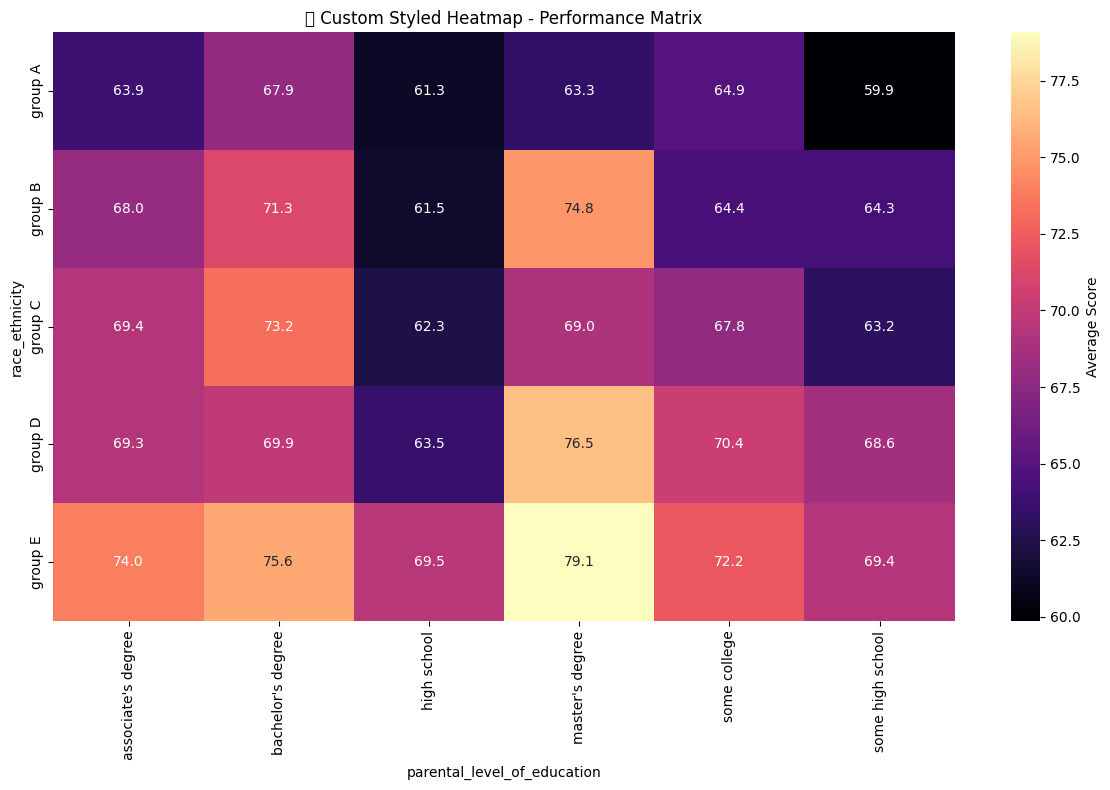

In [33]:
# Custom Styled Heatmap - Performance matrix
heatmap_data = df.pivot_table(values='total_score', 
                             index='race_ethnicity', 
                             columns='parental_level_of_education', 
                             aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='magma', fmt='.1f',
           cbar_kws={'label': 'Average Score'})
plt.title('🔥 Custom Styled Heatmap - Performance Matrix')
plt.tight_layout()
plt.show()


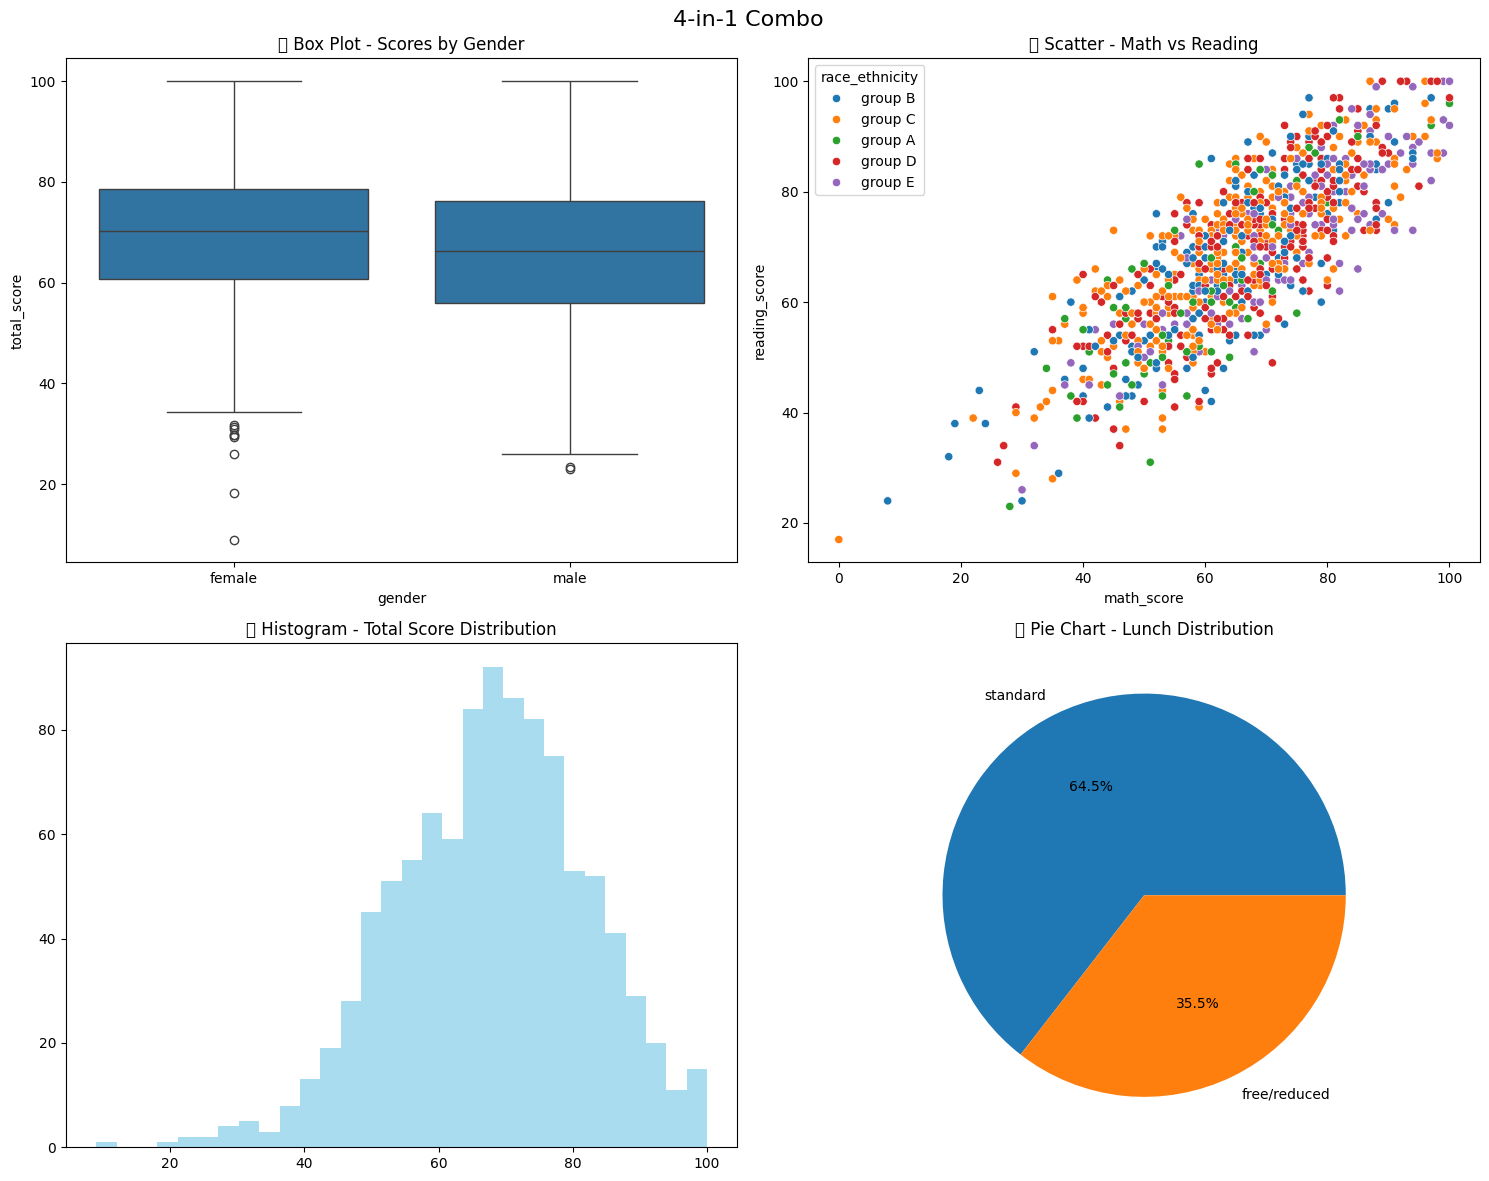

In [35]:
#4-in-1 subplot combo
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Box plot
sns.boxplot(data=df, x='gender', y='total_score', ax=ax1)
ax1.set_title('📦 Box Plot - Scores by Gender')

# Scatter plot
sns.scatterplot(data=df, x='math_score', y='reading_score', 
               hue='race_ethnicity', ax=ax2)
ax2.set_title('💫 Scatter - Math vs Reading')

# Histogram
ax3.hist(df['total_score'], bins=30, color='skyblue', alpha=0.7)
ax3.set_title('📊 Histogram - Total Score Distribution')

# Pie chart
lunch_counts = df['lunch'].value_counts()
ax4.pie(lunch_counts.values, labels=lunch_counts.index, autopct='%1.1f%%')
ax4.set_title('🥪 Pie Chart - Lunch Distribution')

plt.suptitle(' 4-in-1 Combo', fontsize=16)
plt.tight_layout()
plt.show()